### For the sake of my peace and the progress of this project i decided to restart it again with the goal to reach a better structured projekt and better visualisazion of the dataset given.

In order to successfully call this a done project i follow this "Plan"

---

# Preparation:
- Import data
- Import Libaries
- Define not useable collums and rows
- Define no useable data values
- Cleaning data
- check data
- Defining arrays
- Start of visualisazion

-----

# Visualisation:
- Distribution of Male and Female
- Distribution of Risk to Male and Female
- Distribution of Question to Answer
- Distribution to participant from year 2014-2015 and 2016-2017
- Development of the risk over the year

---

### After the visualisation i start to build the module for forecasting with the data

This part is still unexperience and will take more time to do it.

# Module:
- Training data
- Defining rules
- preparation 
- Use cases 


-----

# Preparation:


### Importing data and Libraries

In [109]:
# All libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# importing the medical dataset as 'df'

df = pd.read_csv('MedicalDatasetVision.csv')
df['Sample_Size'].sum()



np.float64(132675205.0)

### Now that we imported the dataset and all the necessary libraries we now take a closer look into the survey data.

In [110]:
df

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Category,Question,Response,Age,...,QuestionID,ResponseID,DataValueTypeID,AgeID,GenderID,RaceEthnicityID,RiskFactorID,RiskFactorResponseID,GeoLocation,Geographic Level
0,2016,2017,US,National,NHIS,Service Utilization,Cataract Surgery,Percentage of people with diagnosed cataract who had a treatment claim,Yes,65-84 years,...,QCATS,RYES,NaN,AGE6584,GF,ASN,RFDM,RFBD,NaN,NaN
1,2016,2017,US,National,NHIS,Service Utilization,Cataract Surgery,Percentage of people with diagnosed cataract who had a treatment claim,Yes,85 years and older,...,QCATS,RYES,NaN,AGE85PLUS,GM,OTH,RFDM,RFNO,NaN,NaN
2,2016,2017,US,National,NHIS,Service Utilization,Eye Protection,Proportion of adults who participate in activities which may cause injury that wear eye protection,Refused,40-64 years,...,ISPROT,RRF,NaN,AGE4064,GALL,OTH,RFDM,RFYES,NaN,NaN
3,2016,2017,US,National,NHIS,Service Utilization,Eye Protection,Proportion of adults who participate in activities which may cause injury that wear eye protection,Don't Know,40-64 years,...,ISPROT,RDK,NaN,AGE4064,GM,ALLRACE,RFDM,RFYES,NaN,NaN
4,2016,2017,US,National,NHIS,Service Utilization,Eye Protection,Proportion of adults who participate in activities which may cause injury that wear eye protection,Some of the time,18-39 years,...,ISPROT,RSOMT,NaN,AGE1839,GM,ASN,RFDM,RFNO,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71644,2016,2017,US,National,NHIS,Visual Function,Visual Field,Percentage of adults who even when wearing glasses or contact lenses find it difficult to notice objects off to the side (NHIS Adult Module),Refused,40-64 years,...,ISNS2,RRF,NaN,AGE4064,GALL,ASN,RFAPAR,RFTOT,NaN,NaN
71645,2016,2017,US,National,NHIS,Visual Function,Visual Field,Percentage of adults who even when wearing glasses or contact lenses find it difficult to notice objects off to the side (NHIS Adult Module),Somewhat difficult,18 years and older,...,ISNS2,RSWD,NaN,AGE18PLUS,GF,ALLRACE,RFAPAR,RFTOT,NaN,NaN
71646,2016,2017,US,National,NHIS,Visual Function,Visual Field,Percentage of adults who even when wearing glasses or contact lenses find it difficult to notice objects off to the side (NHIS Adult Module),Not at all difficult,18-39 years,...,ISNS2,RNOTD,NaN,AGE1839,GF,ALLRACE,RFSM,RFFORM,NaN,NaN
71647,2016,2017,US,National,NHIS,Visual Function,Visual Field,Percentage of adults who even when wearing glasses or contact lenses find it difficult to notice objects off to the side (NHIS Adult Module),Not at all difficult,18-39 years,...,ISNS2,RNOTD,NaN,AGE1839,GF,HISP,RFDM,RFYES,NaN,NaN


 As we can see, the colums "GeoLocation", "Geographic Level", "DataValueTypeID", "Numerator", "Data_Value_Footnote", "Data_Value_Footnote_Symbol" and Data_Value_Unit" are either "NaN" or has no use in our project. So we drop them

In [111]:
df = df.drop(["GeoLocation", "Geographic Level", "DataValueTypeID", "Numerator", "Data_Value_Footnote", "Data_Value_Footnote_Symbol","Data_Value_Unit"], axis =1)

df

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Category,Question,Response,Age,...,LocationID,TopicID,CategoryID,QuestionID,ResponseID,AgeID,GenderID,RaceEthnicityID,RiskFactorID,RiskFactorResponseID
0,2016,2017,US,National,NHIS,Service Utilization,Cataract Surgery,Percentage of people with diagnosed cataract who had a treatment claim,Yes,65-84 years,...,59,TUTL,CCATS,QCATS,RYES,AGE6584,GF,ASN,RFDM,RFBD
1,2016,2017,US,National,NHIS,Service Utilization,Cataract Surgery,Percentage of people with diagnosed cataract who had a treatment claim,Yes,85 years and older,...,59,TUTL,CCATS,QCATS,RYES,AGE85PLUS,GM,OTH,RFDM,RFNO
2,2016,2017,US,National,NHIS,Service Utilization,Eye Protection,Proportion of adults who participate in activities which may cause injury that wear eye protection,Refused,40-64 years,...,59,TUTL,CPROT,ISPROT,RRF,AGE4064,GALL,OTH,RFDM,RFYES
3,2016,2017,US,National,NHIS,Service Utilization,Eye Protection,Proportion of adults who participate in activities which may cause injury that wear eye protection,Don't Know,40-64 years,...,59,TUTL,CPROT,ISPROT,RDK,AGE4064,GM,ALLRACE,RFDM,RFYES
4,2016,2017,US,National,NHIS,Service Utilization,Eye Protection,Proportion of adults who participate in activities which may cause injury that wear eye protection,Some of the time,18-39 years,...,59,TUTL,CPROT,ISPROT,RSOMT,AGE1839,GM,ASN,RFDM,RFNO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71644,2016,2017,US,National,NHIS,Visual Function,Visual Field,Percentage of adults who even when wearing glasses or contact lenses find it difficult to notice objects off to the side (NHIS Adult Module),Refused,40-64 years,...,59,TVFUNC,CFIELD,ISNS2,RRF,AGE4064,GALL,ASN,RFAPAR,RFTOT
71645,2016,2017,US,National,NHIS,Visual Function,Visual Field,Percentage of adults who even when wearing glasses or contact lenses find it difficult to notice objects off to the side (NHIS Adult Module),Somewhat difficult,18 years and older,...,59,TVFUNC,CFIELD,ISNS2,RSWD,AGE18PLUS,GF,ALLRACE,RFAPAR,RFTOT
71646,2016,2017,US,National,NHIS,Visual Function,Visual Field,Percentage of adults who even when wearing glasses or contact lenses find it difficult to notice objects off to the side (NHIS Adult Module),Not at all difficult,18-39 years,...,59,TVFUNC,CFIELD,ISNS2,RNOTD,AGE1839,GF,ALLRACE,RFSM,RFFORM
71647,2016,2017,US,National,NHIS,Visual Function,Visual Field,Percentage of adults who even when wearing glasses or contact lenses find it difficult to notice objects off to the side (NHIS Adult Module),Not at all difficult,18-39 years,...,59,TVFUNC,CFIELD,ISNS2,RNOTD,AGE1839,GF,HISP,RFDM,RFYES


### Now that we have cleaned our useless Colums, we not clean our rows. For that i decided to remove every row that have an empty or "NaN" in Sample_Size" cell.  



In [112]:
df.dropna(subset=['Sample_Size'], inplace=True)

print(df)

       YearStart  YearEnd LocationAbbr LocationDesc DataSource  \
3           2016     2017           US     National       NHIS   
4           2016     2017           US     National       NHIS   
5           2016     2017           US     National       NHIS   
6           2016     2017           US     National       NHIS   
7           2016     2017           US     National       NHIS   
...          ...      ...          ...          ...        ...   
71643       2016     2017           US     National       NHIS   
71644       2016     2017           US     National       NHIS   
71645       2016     2017           US     National       NHIS   
71646       2016     2017           US     National       NHIS   
71648       2016     2017           US     National       NHIS   

                     Topic                    Category  \
3      Service Utilization              Eye Protection   
4      Service Utilization              Eye Protection   
5      Service Utilization       

### now we have a clean and useable dataframe. but to make sure to take good use and prepare it for the visualisation we need to get rid of data we can't use properly.

### in this case i decided, for the sake of simplicity, to remove the following values inside of certain colums.



    

Test    

   | Columns          |  | Value to be Removed | reason                                                                                   | 
   |:-----------------|:-|:--------------------|:-----------------------------------------------------------------------------------------|
   | Age              |  | 'All ages'          | not usable for my intention and would manipulate my outcome                              |
   | Age              |  | '85 years and older | not usable for my intentions and would manipulate my outcome                             |
   | Age              |  | '18 years and older | not usable for my intentions and would manipulate my outcome                             |
   | RiskFactors      |  | 'All participant'   | To make sure i only have pre dertermaint groups that i can work and use for statistics   |
   | Gender           |  | 'All Genders'       | To have only 2 Genders and use it for better calculation and visualisation               |
   | RaceEtnicity     |  | 'All races'         | I only need clear race Etnicity in order to make sure that everything is given correctly |
   | RiskFactorAnswer |  | 'Total'             | No Idea what i could do with this data                                                   |
   | RiskFactorAnswer |  | 'Brodeline'         | No Idea what i could do with this data                                                   |
   
### For that i am using a solution from Stack overflow where th program gets every index out of the Data Frame and saves it as an array then deleting the row given by the index array.
    


In [5]:
#https://stackoverflow.com/questions/14661701/how-to-drop-a-list-of-rows-from-pandas-dataframe

ind_drop = df[df['Age'].apply(lambda x: x.startswith('All ages'))].index
df = df.drop(ind_drop)

ind_drop = df[df['Age'].apply(lambda x: x.startswith('85 years and older'))].index
df = df.drop(ind_drop)

ind_drop = df[df['Age'].apply(lambda x: x.startswith('18 years and older'))].index
df = df.drop(ind_drop)

ind_drop = df[df['RiskFactor'].apply(lambda x: x.startswith('All participants'))].index
df = df.drop(ind_drop)

ind_drop = df[df['Gender'].apply(lambda x: x.startswith('All genders'))].index
df = df.drop(ind_drop)

ind_drop = df[df['RaceEthnicity'].apply(lambda x: x.startswith('All races'))].index
df = df.drop(ind_drop)

ind_drop = df[df['RiskFactorResponse'].apply(lambda x: x.startswith('Total'))].index
df = df.drop(ind_drop)

ind_drop = df[df['RiskFactorResponse'].apply(lambda x: x.startswith('Borderline'))].index
df = df.drop(ind_drop)



df['RiskFactor'].unique()

array(['Diabetes', 'Hypertension', 'Smoking'], dtype=object)

### In order to support our aurguments and not missleading our dataset we are going to define wich Sample in relation to the question we are going to use.

In [6]:
df['Question'].unique()

array(['Proportion of adults who participate in activities which may cause injury that wear eye protection',
       'Percentage of adults who are blind or unable to see at all (NHIS Adult Module)',
       'Percentage of adults who even when wearing glasses or contact lenses find it difficult to find something on a crowded shelf (NHIS Adult Module)',
       'Percentage of adults who even when wearing glasses or contact lenses find it difficult to read ordinary print in newspapers (NHIS Adult Module)',
       'Percentage of adults who even when wearing glasses or contact lenses find it difficult to go down steps, stairs, or curbs in dim light or at night (NHIS Adult Module)',
       'Percentage of adults who even when wearing glasses or contact lenses find it difficult to notice objects off to the side (NHIS Adult Module)',
       'Percentage of people who have (no, some, a lot) difficulty seeing even when wearing glasses (NHIS Functioning and Disability Module)',
       'Percentage of a

## We are going to delete all datas in relation with the question asked about Sports

In [7]:
# 'Proportion of adults who participate in activities which may cause injury that wear eye protection

ind_drop = df[df['Question'].apply(lambda x: x.startswith('Proportion of adults who participate in activities which may cause injury that wear eye protection'))].index
df = df.drop(ind_drop)

ind_drop = df[df['Question'].apply(lambda x: x.startswith('Percentage of adults who participate in sports, hobbies, or other activities that can cause eye injury outside of work (NHIS Adult Module)'))].index
df = df.drop(ind_drop)

ind_drop = df[df['Question'].apply(lambda x: x.startswith('Percentage of adults who when wearing glasses or contact lenses find it difficult to do work or hobbies that require them to see well up close (NHIS Adult Module)'))].index
df = df.drop(ind_drop)

ind_drop = df[df['Question'].apply(lambda x: x.startswith('Percentage of adults who even when wearing glasses or contact lenses find it (not at all, only a little, somewhat, or very) difficult to drive during daytime in familiar places (NHIS Adult Module)'))].index
df = df.drop(ind_drop)

ind_drop = df[df['Question'].apply(lambda x: x.startswith('Percentage of adults ever told by a doctor or other health professional they had cataracts (NHIS Adult Module)'))].index
df = df.drop(ind_drop)

ind_drop = df[df['Question'].apply(lambda x: x.startswith('Percentage of adults ever told by a doctor or other health professional they had diabetic retinopathy (NHIS Adult Module)'))].index
df = df.drop(ind_drop)

ind_drop = df[df['Question'].apply(lambda x: x.startswith( 'Percentage of adults ever told by a doctor or other health professional they had glaucoma (NHIS Adult Module)'))].index
df = df.drop(ind_drop)

ind_drop = df[df['Question'].apply(lambda x: x.startswith( 'Percentage of adults ever told by a doctor or other health professional they had macular degeneration (NHIS Adult Module)'))].index
df = df.drop(ind_drop)

ind_drop = df[df['Question'].apply(lambda x: x.startswith( 'Percentage of adults who in the past 12 months have seen or talked to an optometrist, optician, or eye doctor (someone who prescribes eyeglasses)  about their own health (NHIS Adult Module)'))].index
df = df.drop(ind_drop)

ind_drop = df[df['Question'].apply(lambda x: x.startswith( 'Percentage of people with diagnosed cataract who had a treatment claim'))].index
df = df.drop(ind_drop)

df['Question'].unique()



array(['Percentage of adults who are blind or unable to see at all (NHIS Adult Module)',
       'Percentage of adults who even when wearing glasses or contact lenses find it difficult to find something on a crowded shelf (NHIS Adult Module)',
       'Percentage of adults who even when wearing glasses or contact lenses find it difficult to read ordinary print in newspapers (NHIS Adult Module)',
       'Percentage of adults who even when wearing glasses or contact lenses find it difficult to go down steps, stairs, or curbs in dim light or at night (NHIS Adult Module)',
       'Percentage of adults who even when wearing glasses or contact lenses find it difficult to notice objects off to the side (NHIS Adult Module)',
       'Percentage of people who have (no, some, a lot) difficulty seeing even when wearing glasses (NHIS Functioning and Disability Module)',
       'Percentage of adults who have trouble seeing even when wearing glasses or contact lenses (NHIS Adult Module)',
       'Perce

### Now that we declared the Question we are working with, we are going to seperate them into different arrays for visualisation reasons

In [8]:
peopleWearingGlasses = ['Percentage of adults who currently wear eyeglasses or contact lenses (NHIS Adult Module)']

peopleHavingVisionProblemWithGlasses= [
       'Percentage of adults who even when wearing glasses or contact lenses find it difficult to find something on a crowded shelf (NHIS Adult Module)',
       'Percentage of adults who even when wearing glasses or contact lenses find it difficult to read ordinary print in newspapers (NHIS Adult Module)',
       'Percentage of adults who even when wearing glasses or contact lenses find it difficult to go down steps, stairs, or curbs in dim light or at night (NHIS Adult Module)']

peopleHavingVisionLoss = ['Percentage of adults who are blind or unable to see at all (NHIS Adult Module)']

allQuestions = ['Percentage of adults who are blind or unable to see at all (NHIS Adult Module)',
       'Percentage of adults who even when wearing glasses or contact lenses find it difficult to find something on a crowded shelf (NHIS Adult Module)',
       'Percentage of adults who even when wearing glasses or contact lenses find it difficult to read ordinary print in newspapers (NHIS Adult Module)',
       'Percentage of adults who even when wearing glasses or contact lenses find it difficult to go down steps, stairs, or curbs in dim light or at night (NHIS Adult Module)',
       'Percentage of adults who even when wearing glasses or contact lenses find it difficult to notice objects off to the side (NHIS Adult Module)',
       'Percentage of people who have (no, some, a lot) difficulty seeing even when wearing glasses (NHIS Functioning and Disability Module)',
       'Percentage of adults who have trouble seeing even when wearing glasses or contact lenses (NHIS Adult Module)',
       'Percentage of people who wear glasses (NHIS Functioning and Disability Module)',
       'Percentage of adults who currently wear eyeglasses or contact lenses (NHIS Adult Module)']



### Now that we have cleared our questions we need to see what kind of response there are.


In [9]:
print(df['Response'].unique())

['Yes' 'Refused' "Don't Know" 'Very difficult' 'Only a little difficult'
 'Somewhat difficult' 'A lot of difficulty' 'Not ascertained'
 'Some difficulty' 'Cannot do at all/Unable to do' 'No difficulty'
 'Not at all difficult' 'Do not do this activity for other reasons'
 "Can't do at all because of eyesight"]


### now we are going to separate them like we did with the Questions

In [10]:
positiveResponse = ['Yes','Always', 'Most of the time']

difficultyHigh = ['Very difficult','Cannot do at all/Unable to do',]
difficutyMedium = ['Somewhat difficult', 'A lot of difficulty',]
difficultyLow = ['Only a little difficult','Some of the time','No difficulty', 'Not at all difficult']

unclearResponse = ['Not ascertained',"Don't Know"]
negativeResponse = ['Not ascertained', 'Refused', 'Do not do this activity for other reasons','None of the time',"Can't do at all because of eyesight"]


allQuestionAnswers = df['Response'].unique()


### We are going to create a new CSV file to prove that i cleaned the data

In [11]:
df.to_csv('CleanedDataset.csv')

### now after we have cleared our data and pre-processed it into useabel format, we now go on and declare our arrays in order to use them later for the visualisation

### For the Arrays we are going to declare every key aspect of our visualisation.
### for this we declare following arrays:
- yearStarts
- genders
- riskFactors
- riskFactorsResponse
- smokingAnswers
- questionAsk
- ageRange
- positiveRiskFactorsResponse
- questionAsk
### Future arrays will be added


In [12]:
yearStarts = df['YearStart'].unique()
ageRange = df['Age'].unique()
genders = df['Gender'].unique()
riskFactors = df['RiskFactor'].unique()
riskFactorsAnswers = df['RiskFactorResponse'].unique()
smokingAnswers = ['Current smoker','Never smoker','Former smoker']
questionAsk = df['Question'].unique()
positiveRiskFactorsResponse = ['Yes','Current smoker']


### After declaring the arrays we start to visualisation

----
# Visualisation

### We start with visualize the age distribution of the survey

In [91]:
df['Sample_Size'].sum()


np.float64(6957812.0)

Text(0.5, 1.0, 'Distribution of Age ranges')

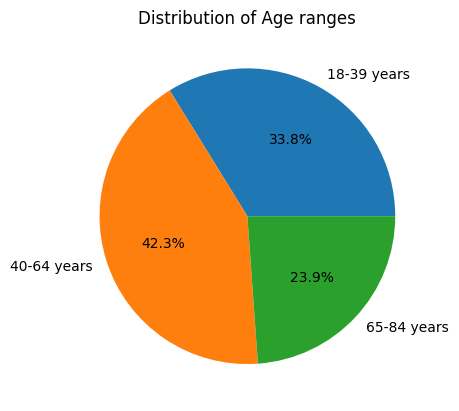

In [28]:
aged_classed_participant = {age: { 'participant': df[df['Age'] == age]['Sample_Size'].sum()} for age in ageRange}

all_particpant = df['Sample_Size'].sum()

participant_percentage = {age: (aged_classed_participant.get(age).get('participant') / all_particpant) *100 for age in ageRange}
    
plt.pie(participant_percentage.values(),labels=participant_percentage.keys() ,autopct='%1.1f%%')
plt.title("Distribution of Age ranges")

### now we take a look how the distribution is between male and Female

([<matplotlib.patches.Wedge at 0x21be3b2b320>,
 [Text(-0.15407564624200784, 1.0891559554237895, 'Female'),
  Text(0.15407587129655367, -1.0891559235867967, 'Male')],
 [Text(-0.08404126158654973, 0.5940850665947942, '54.5%'),
  Text(0.08404138434357472, -0.5940850492291617, '45.5%')])

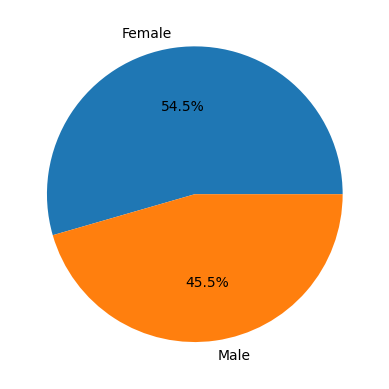

In [14]:
genderClassedDistribution = {gender: {'amount': df[df['Gender'] == gender]['Sample_Size'].sum() } for gender in genders}

allGenderAmount = df['Sample_Size'].sum()

genderPercentage = {gender: (genderClassedDistribution.get(gender).get('amount') / all_particpant) *100 for gender in genders}

plt.pie(genderPercentage.values(),labels=genderPercentage.keys() ,autopct='%1.1f%%')


### After we know how the distribution of Women and Men is in this Survey we are going to slide our attention to risk distribution of the risk factors


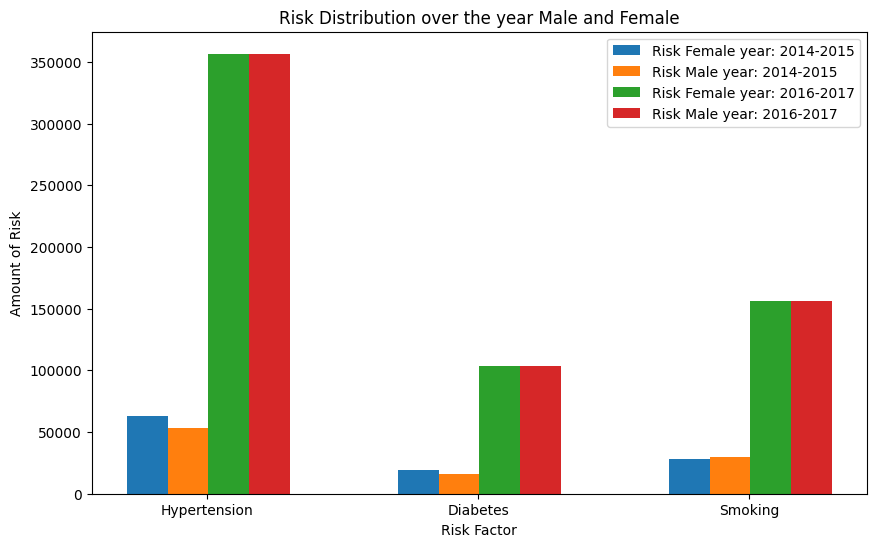

In [15]:

# Getting all the data out of the Dataframe
yearRiskFemale2014 = {risk:  df[(df['RiskFactor'] == risk) & ((df['RiskFactorResponse'] == 'Yes') | (df['RiskFactorResponse'] == 'Current smoker' )) & (df['YearStart'] == 2014) & (df['Gender'] == 'Female')]['Sample_Size'].sum()  for risk in riskFactors}
yearRiskMale2014 = {risk:  df[(df['RiskFactor'] == risk) & ((df['RiskFactorResponse'] == 'Yes') | (df['RiskFactorResponse'] == 'Current smoker' )) & (df['YearStart'] == 2014) & (df['Gender'] == 'Male')]['Sample_Size'].sum()  for risk in riskFactors}
yearRiskFemale2016 = {risk:  df[(df['RiskFactor'] == risk) & ((df['RiskFactorResponse'] == 'Yes') | (df['RiskFactorResponse'] == 'Current smoker' )) & (df['YearStart'] == 2016) & (df['Gender'] == 'Female')]['Sample_Size'].sum()  for risk in riskFactors}
yearRiskMale2016 = {risk:  df[(df['RiskFactor'] == risk) & ((df['RiskFactorResponse'] == 'Yes') | (df['RiskFactorResponse'] == 'Current smoker' )) & (df['YearStart'] == 2016) & (df['Gender'] == 'Female')]['Sample_Size'].sum()  for risk in riskFactors}

#Building the Bar char


bar_width = 0.15
r1 = np.arange(len(riskFactors))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

fig, ax  = plt.subplots(figsize=(10, 6))
ax.bar(r1, yearRiskFemale2014.values(),width=bar_width, label='Risk Female year: 2014-2015')
ax.bar(r2, yearRiskMale2014.values(),width=bar_width, label='Risk Male year: 2014-2015')
ax.bar(r3, yearRiskFemale2016.values(),width=bar_width, label='Risk Female year: 2016-2017')
ax.bar(r4, yearRiskMale2016.values(),width=bar_width, label='Risk Male year: 2016-2017')
ax.set_xticks(([r + (bar_width + 0.07)  for r in range(len(riskFactors))]))
ax.set_xticklabels(riskFactors)
ax.set_title('Risk Distribution over the year Male and Female')
ax.set_xlabel('Risk Factor')
ax.set_ylabel('Amount of Risk')
ax.legend()



### In order to take any value information out of this graph we are going to split and take a closer look into the risk factors by male and female splitted by the year

# 2014:

([<matplotlib.patches.Wedge at 0x21be3e92ab0>,
 [Text(-0.24186168397684893, 1.0730810434556577, 'Hypertension'),
  Text(-0.6005732613079127, -0.9215811184057418, 'Diabetes'),
  Text(0.7669776698808173, -0.7885082459329085, 'Smoking')],
 [Text(-0.13192455489646304, 0.585316932793995, '57.1%'),
  Text(-0.3275854152588614, -0.5026806100394954, '17.5%'),
  Text(0.4183514562986276, -0.43009540687249553, '25.4%')])

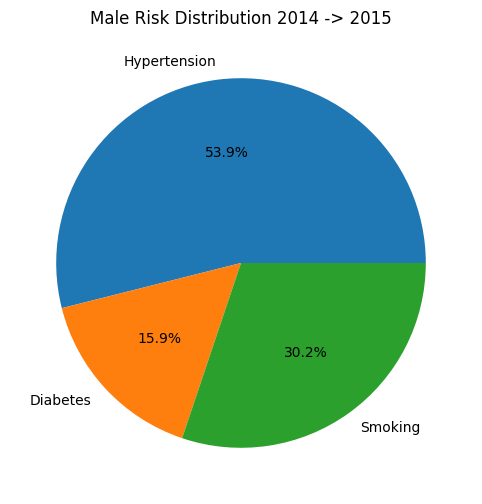

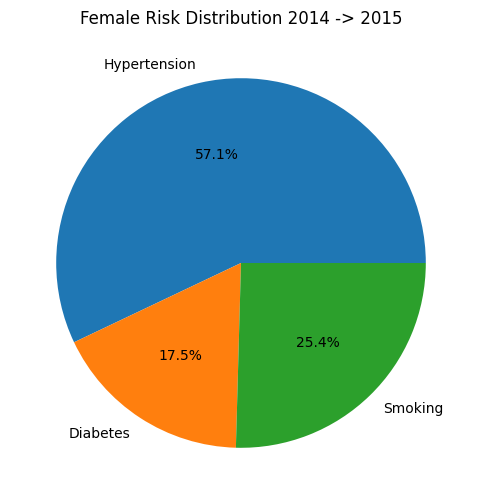

In [16]:
# we are going to create a pie chart to see the distribution o the Risk factors of a year (in this survey 2014->2015 and 2016-> 2017)
# To get the right data we need to filter it by the year, gender and risk factors

# We start with the all gender oriented participant of the year 2014 and storing them in these Values
allMaleParticipant2014 = df[(df['Gender'] == 'Male') & (df['YearStart'] == 2014) & ((df['RiskFactorResponse'] == 'Yes') | (df['RiskFactorResponse'] == 'Current smoker'))]['Sample_Size'].sum()
allFemaleParticipant2014 = df[(df['Gender'] == 'Female') & (df['YearStart'] == 2014) & ((df['RiskFactorResponse'] == 'Yes') | (df['RiskFactorResponse'] == 'Current smoker'))]['Sample_Size'].sum()


# Getting all specific Values from the Dataset
maleRiskValues = {riskFactor : df[(df['Gender'] == 'Male') & (df['YearStart'] == 2014) &( df['RiskFactor'] == riskFactor)& ((df['RiskFactorResponse'] == 'Yes') | (df['RiskFactorResponse'] == 'Current smoker'))]['Sample_Size'].sum() for riskFactor in riskFactors}

femaleRiskValues = {riskFactor : df[(df['Gender'] == 'Female') & (df['YearStart'] == 2014) & (df['RiskFactor'] == riskFactor) & ((df['RiskFactorResponse'] == 'Yes') | (df['RiskFactorResponse'] == 'Current smoker'))]['Sample_Size'].sum() for riskFactor in riskFactors}


#Calculating the percentage of the risk factor differenced by the gender

#Creating an Array for the Pie Char

femalePieCharValue  =   {riskFactor : (femaleRiskValues.get(riskFactor) / allFemaleParticipant2014) *100 for riskFactor in riskFactors}
malePieCharValue  =   {riskFactor : (maleRiskValues.get(riskFactor) / allMaleParticipant2014) *100 for riskFactor in riskFactors}


fig, maleRiskPie2014  = plt.subplots(figsize=(10, 6))
maleRiskPie2014.set_title('Male Risk Distribution 2014 -> 2015')
maleRiskPie2014.pie(malePieCharValue.values(),labels=malePieCharValue.keys() ,autopct='%1.1f%%')

fig, femaleRiskPie2014  = plt.subplots(figsize=(10, 6))
femaleRiskPie2014.set_title('Female Risk Distribution 2014 -> 2015')
femaleRiskPie2014.pie(femalePieCharValue.values(),labels=femalePieCharValue.keys() ,autopct='%1.1f%%')



# 2016->2017:

([<matplotlib.patches.Wedge at 0x21be414ffb0>,
 [Text(-0.2708383399343588, 1.0661362922354725, 'Hypertension'),
  Text(-0.5719997356803788, -0.939583047091409, 'Diabetes'),
  Text(0.7698219088595849, -0.7857316517996363, 'Smoking')],
 [Text(-0.14773000360055932, 0.581528886673894, '57.9%'),
  Text(-0.31199985582566114, -0.5124998438680413, '16.8%'),
  Text(0.4199028593779554, -0.4285809009816198, '25.3%')])

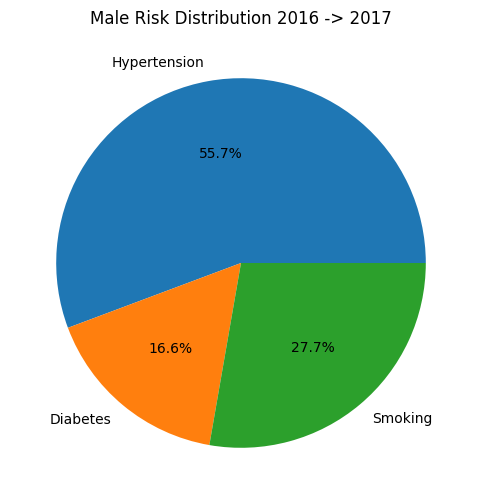

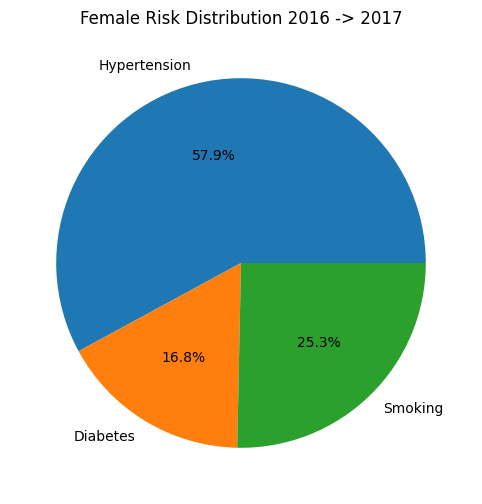

In [17]:
# we are going to create a pie chart to see the distribution o the Risk factors of a year (in this survey 2014->2015 and 2016-> 2017)
# To get the right data we need to filter it by the year, gender and risk factors

# We start with the all gender oriented participant of the year 2014 and storing them in these Values
allMaleParticipant2016 = df[(df['Gender'] == 'Male') & (df['YearStart'] == 2016) & ((df['RiskFactorResponse'] == 'Yes') | (df['RiskFactorResponse'] == 'Current smoker'))]['Sample_Size'].sum()
allFemaleParticipant2016 = df[(df['Gender'] == 'Female') & (df['YearStart'] == 2016) & ((df['RiskFactorResponse'] == 'Yes') | (df['RiskFactorResponse'] == 'Current smoker'))]['Sample_Size'].sum()


# Getting all specific Values from the Dataset
maleRiskValues = {riskFactor : df[(df['Gender'] == 'Male') & (df['YearStart'] == 2016) &( df['RiskFactor'] == riskFactor)& ((df['RiskFactorResponse'] == 'Yes') | (df['RiskFactorResponse'] == 'Current smoker'))]['Sample_Size'].sum() for riskFactor in riskFactors}

femaleRiskValues = {riskFactor : df[(df['Gender'] == 'Female') & (df['YearStart'] == 2016) & (df['RiskFactor'] == riskFactor) & ((df['RiskFactorResponse'] == 'Yes') | (df['RiskFactorResponse'] == 'Current smoker'))]['Sample_Size'].sum() for riskFactor in riskFactors}


#Calculating the percentage of the risk factor differenced by the gender
femalePieCharValue  =   {riskFactor : (femaleRiskValues.get(riskFactor) / allFemaleParticipant2016) *100 for riskFactor in riskFactors}
malePieCharValue  =   {riskFactor : (maleRiskValues.get(riskFactor) / allMaleParticipant2016) *100 for riskFactor in riskFactors}


fig, maleRiskPie2016  = plt.subplots(figsize=(10, 6))
maleRiskPie2016.set_title('Male Risk Distribution 2016 -> 2017')
maleRiskPie2016.pie(malePieCharValue.values(),labels=malePieCharValue.keys() ,autopct='%1.1f%%')

fig, femaleRiskPie2016  = plt.subplots(figsize=(10, 6))
femaleRiskPie2016.set_title('Female Risk Distribution 2016 -> 2017')
femaleRiskPie2016.pie(femalePieCharValue.values(),labels=femalePieCharValue.keys() ,autopct='%1.1f%%')

### Taking a closer look to those who has problem seeing at different situation with glasses (e.g on a crowded shelf) 

### We will seperate them into all togheter, age, ethnical background, Risk factors 

In [18]:


ethnicalBackgrounds = df['RaceEthnicity'].unique()

# getting all Participant for the pie char
mask = df['Question'].isin(peopleHavingVisionProblemWithGlasses)
allParticipantWithVisionProblem = df[mask]['Sample_Size'].sum()


ethnicalBackgroundInformation = {
    ethnicalBackground: {
        glassesQuestion:
            df[(df['Question'] == glassesQuestion) & (df['RaceEthnicity'] == ethnicalBackground )]['Sample_Size'].sum() for glassesQuestion in peopleHavingVisionProblemWithGlasses}for ethnicalBackground in ethnicalBackgrounds } 

ethnicalBackgroundSummedInformation = {ethnicalBackground: 0 for ethnicalBackground in ethnicalBackgrounds}

 

summedInformation = 0

for ethnicalBackground in ethnicalBackgroundInformation:
    for glassesQuestion in peopleHavingVisionProblemWithGlasses:
            summedInformation += ethnicalBackgroundInformation[ethnicalBackground][glassesQuestion]
    ethnicalBackgroundSummedInformation[ethnicalBackground] = summedInformation



([<matplotlib.patches.Wedge at 0x21be4193b30>,
 [Text(1.099351373784334, 0.03776978896549322, 'Asian'),
  Text(0.9096612084669702, 0.6184791716868174, 'White, non-Hispanic'),
  Text(-0.10553367895259322, 1.0949258616941748, 'Other'),
  Text(-1.0486903879518237, 0.3320368506919878, 'Hispanic, any race'),
  Text(-0.5726165470405495, -0.9392072668241863, 'Black, non-Hispanic'),
  Text(0.8359513175329556, -0.7149723034600123, 'North American Native')],
 [Text(0.5996462038823639, 0.02060170307208721, '1.1%'),
  Text(0.49617884098198367, 0.33735227546553676, '16.8%'),
  Text(-0.05756382488323266, 0.5972322881968226, '17.2%'),
  Text(-0.5720129388828129, 0.18111100946835698, '19.9%'),
  Text(-0.3123362983857542, -0.5122948728131924, '22.4%'),
  Text(0.4559734459270666, -0.3899848927963703, '22.5%')])

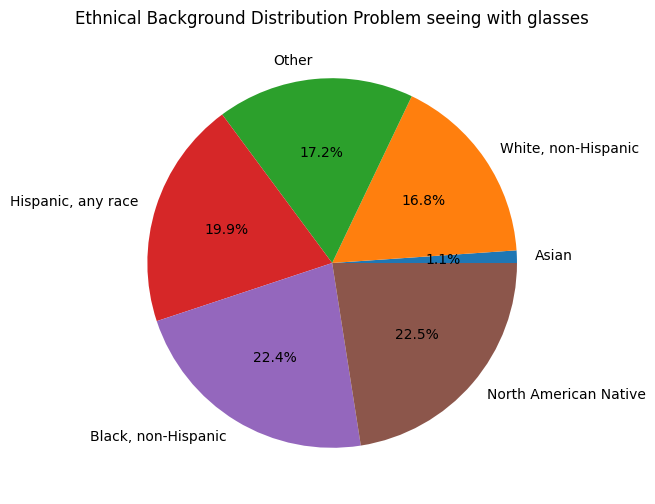

In [19]:


ethnicalBackgroundPieValues = {ethnicalBackground: (ethnicalBackgroundSummedInformation.get(ethnicalBackground) / allParticipantWithVisionProblem) * 100 for ethnicalBackground in ethnicalBackgrounds}



fig, maleRiskPie2016  = plt.subplots(figsize=(10, 6))
maleRiskPie2016.set_title('Ethnical Background Distribution Problem seeing with glasses')
maleRiskPie2016.pie(ethnicalBackgroundPieValues.values(),labels=ethnicalBackgroundPieValues.keys() ,autopct='%1.1f%%')

### Value preparation for the visualisation

In [20]:
ResponseTypes = ['High', 'Medium', 'Low']
ResponseLevelReferences = {
    'High': difficultyHigh,
    'Medium':difficutyMedium,
    'Low': difficultyLow}

allParticipantWithVisionProblemResponseType = {
'High': {glassesQuestion:
             {difficultyH:
                  df[(df['Question'] == glassesQuestion) & (df['Response'] == difficultyH) ]['Sample_Size'].sum() for difficultyH in difficultyHigh} for glassesQuestion in peopleHavingVisionProblemWithGlasses},
    
'Medium': {glassesQuestion: 
               {difficultyM: 
                    df[(df['Question'] == glassesQuestion) & (df['Response'] == difficultyM) ]['Sample_Size'].sum() for difficultyM in difficutyMedium} for glassesQuestion in peopleHavingVisionProblemWithGlasses},
    
'Low': {glassesQuestion: 
            {difficultyL: 
                 df[(df['Question'] == glassesQuestion) & (df['Response'] == difficultyL) ]['Sample_Size'].sum() for difficultyL in difficultyLow} for glassesQuestion in peopleHavingVisionProblemWithGlasses}
    
}

allParticipantDifficultySummed = {
    ResponseType:
        0 for ResponseType in ResponseTypes}

for difficultyLevel in ResponseTypes:
    for glassesQuestion in peopleHavingVisionProblemWithGlasses:
        for ResponseLevelReference in ResponseLevelReferences[difficultyLevel]:
             summedInformation += allParticipantWithVisionProblemResponseType[difficultyLevel][glassesQuestion][ResponseLevelReference]
    allParticipantDifficultySummed[difficultyLevel] = summedInformation


### Now we are going to take a closer look which ethnical background has the highest difficulties to lowes difficulties of seeing with glasses.

In [21]:


ethnicalBackgroundInformationDifficultyHigh = {
    ethnicalBackground: 
         {glassesQuestion: 
              {difficultyH: 
                   df[(df['Question'] == glassesQuestion) & (df['Response'] == difficultyH )& (df['RaceEthnicity'] == ethnicalBackground )]['Sample_Size'].sum() for difficultyH in difficultyHigh} for glassesQuestion in peopleHavingVisionProblemWithGlasses}for ethnicalBackground in ethnicalBackgrounds } 

ethnicalBackgroundSummedInformationDifficultyHigh = {ethnicalBackground: 0 for ethnicalBackground in ethnicalBackgrounds}

summedInformation = 0

for ethnicalBackground in ethnicalBackgroundInformation:
    for glassesQuestion in peopleHavingVisionProblemWithGlasses:
        for difficultyH in difficultyHigh:
            summedInformation += ethnicalBackgroundInformationDifficultyHigh[ethnicalBackground][glassesQuestion][difficultyH]
    ethnicalBackgroundSummedInformationDifficultyHigh[ethnicalBackground] = summedInformation

([<matplotlib.patches.Wedge at 0x21be4570470>,
 [Text(1.0993505937716403, 0.03779248568090892, 'Asian'),
  Text(0.9096000462599305, 0.6185691196979789, 'White, non-Hispanic'),
  Text(-0.10577436511692212, 1.0949026366230525, 'Other'),
  Text(-1.0488044801064254, 0.33167629174948726, 'Hispanic, any race'),
  Text(-0.5721740087739677, -0.9394769308948079, 'Black, non-Hispanic'),
  Text(0.8361435692036719, -0.7147474600719785, 'North American Native')],
 [Text(0.5996457784208947, 0.02061408309867759, '1.1%'),
  Text(0.4961454797781439, 0.33740133801707933, '16.8%'),
  Text(-0.057695108245593874, 0.5972196199762104, '17.2%'),
  Text(-0.5720751709671411, 0.18091434095426576, '20.0%'),
  Text(-0.3120949138767097, -0.5124419623062588, '22.4%'),
  Text(0.4560783104747301, -0.38986225094835186, '22.5%')])

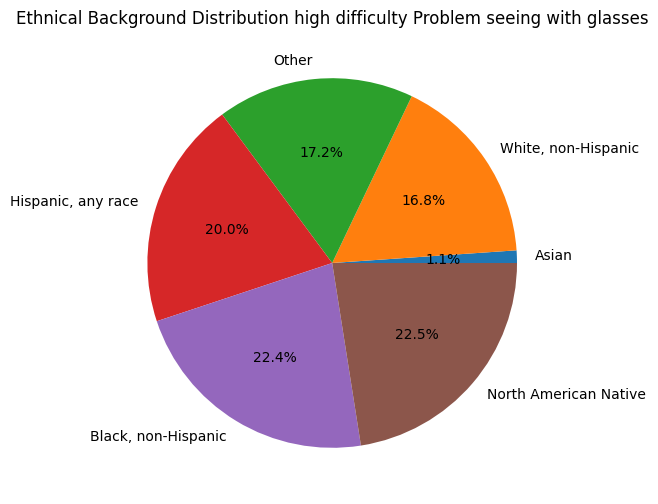

In [22]:
ethnicalBackgroundPieValues = \
    {ethnicalBackground: 
         (ethnicalBackgroundSummedInformationDifficultyHigh.get(ethnicalBackground) / allParticipantDifficultySummed.get('High')) * 100 for ethnicalBackground in ethnicalBackgrounds}



fig, maleRiskPie2016  = plt.subplots(figsize=(10, 6))
maleRiskPie2016.set_title('Ethnical Background Distribution high difficulty Problem seeing with glasses')
maleRiskPie2016.pie(ethnicalBackgroundPieValues.values(),labels=ethnicalBackgroundPieValues.keys() ,autopct='%1.1f%%')

### Medium Difficulty

In [23]:


ethnicalBackgroundInformationDifficultyMedium = {
    ethnicalBackground: 
         {glassesQuestion: 
              {difficultyM: 
                   df[(df['Question'] == glassesQuestion) & (df['Response'] == difficultyM )& (df['RaceEthnicity'] == ethnicalBackground )]['Sample_Size'].sum() for difficultyM in difficutyMedium} for glassesQuestion in peopleHavingVisionProblemWithGlasses}for ethnicalBackground in ethnicalBackgrounds } 

ethnicalBackgroundSummedInformationDifficultyMedium = {ethnicalBackground: 0 for ethnicalBackground in ethnicalBackgrounds}

summedInformation = 0

for ethnicalBackground in ethnicalBackgroundInformation:
    for glassesQuestion in peopleHavingVisionProblemWithGlasses:
        for difficultyM in difficutyMedium:
            summedInformation += ethnicalBackgroundInformationDifficultyMedium[ethnicalBackground][glassesQuestion][difficultyM]
    ethnicalBackgroundSummedInformationDifficultyMedium[ethnicalBackground] = summedInformation
    
    

([<matplotlib.patches.Wedge at 0x21be45cce60>,
 [Text(1.0993533873741237, 0.03771113454989177, 'Asian'),
  Text(0.9095165652204596, 0.6186918599671224, 'White, non-Hispanic'),
  Text(-0.10604271633178089, 1.0948766790433422, 'Other'),
  Text(-1.0487589214095632, 0.3318203199984139, 'Hispanic, any race'),
  Text(-0.5726456569455668, -0.9391895184580056, 'Black, non-Hispanic'),
  Text(0.8359090413268859, -0.7150217301788575, 'North American Native')],
 [Text(0.5996473022040675, 0.020569709754486416, '1.1%'),
  Text(0.49609994466570523, 0.337468287254794, '16.8%'),
  Text(-0.05784148163551684, 0.5972054612963683, '17.2%'),
  Text(-0.5720503207688526, 0.18099290181731664, '19.9%'),
  Text(-0.31235217651576364, -0.5122851918861848, '22.4%'),
  Text(0.4559503861783013, -0.3900118528248313, '22.5%')])

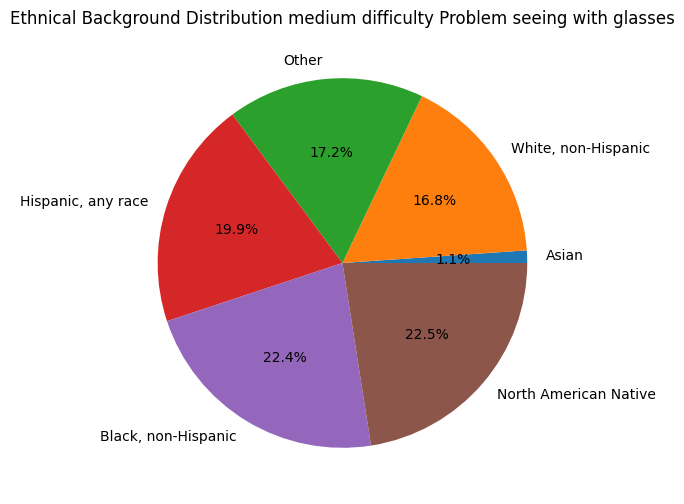

In [24]:
ethnicalBackgroundPieValues = {ethnicalBackground: (ethnicalBackgroundSummedInformationDifficultyMedium.get(ethnicalBackground) / allParticipantDifficultySummed.get('Medium')) * 100 for ethnicalBackground in ethnicalBackgrounds}



fig, maleRiskPie2016  = plt.subplots(figsize=(10, 6))
maleRiskPie2016.set_title('Ethnical Background Distribution medium difficulty Problem seeing with glasses')
maleRiskPie2016.pie(ethnicalBackgroundPieValues.values(),labels=ethnicalBackgroundPieValues.keys() ,autopct='%1.1f%%')

### Low Difficulty

In [25]:
ethnicalBackgroundInformationDifficultyLow = {
    ethnicalBackground: {
        glassesQuestion: {
            difficultyL: 
                df[(df['Question'] == glassesQuestion) & (df['Response'] == difficultyL )& (df['RaceEthnicity'] == ethnicalBackground )]['Sample_Size'].sum() for difficultyL in difficultyLow} for glassesQuestion in peopleHavingVisionProblemWithGlasses}for ethnicalBackground in ethnicalBackgrounds } 

ethnicalBackgroundSummedInformationDifficultyLow = {ethnicalBackground: 0 for ethnicalBackground in ethnicalBackgrounds}

summedInformation = 0

for ethnicalBackground in ethnicalBackgroundInformation:
    for glassesQuestion in peopleHavingVisionProblemWithGlasses:
        for difficultyL in difficultyLow:
            summedInformation += ethnicalBackgroundInformationDifficultyLow[ethnicalBackground][glassesQuestion][difficultyL]
    ethnicalBackgroundSummedInformationDifficultyLow[ethnicalBackground] = summedInformation
    
    

([<matplotlib.patches.Wedge at 0x21be4625610>,
 [Text(1.0993668724373002, 0.0373159454848616, 'Asian'),
  Text(0.9098418412489601, 0.6182134129187932, 'White, non-Hispanic'),
  Text(-0.10575700560242489, 1.0949043135205967, 'Other'),
  Text(-1.0487594751930072, 0.33181856969266876, 'Hispanic, any race'),
  Text(-0.5722049189124504, -0.9394581048521516, 'Black, non-Hispanic'),
  Text(0.8361752644692358, -0.7147103798671205, 'North American Native')],
 [Text(0.5996546576930728, 0.020354152082651778, '1.1%'),
  Text(0.49627736795397814, 0.33720731613752347, '16.8%'),
  Text(-0.05768563941950448, 0.5972205346475981, '17.2%'),
  Text(-0.5720506228325493, 0.18099194710509203, '20.0%'),
  Text(-0.3121117739522456, -0.512431693555719, '22.4%'),
  Text(0.4560955988014013, -0.3898420253820657, '22.5%')])

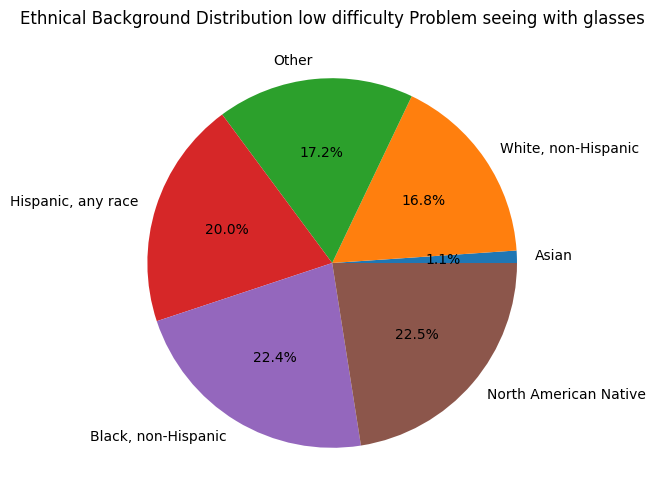

In [26]:
ethnicalBackgroundPieValues = {ethnicalBackground: (ethnicalBackgroundSummedInformationDifficultyLow.get(ethnicalBackground) / allParticipantDifficultySummed.get('Low')) * 100 for ethnicalBackground in ethnicalBackgrounds}



fig, maleRiskPie2016  = plt.subplots(figsize=(10, 6))
maleRiskPie2016.set_title('Ethnical Background Distribution low difficulty Problem seeing with glasses')
maleRiskPie2016.pie(ethnicalBackgroundPieValues.values(),labels=ethnicalBackgroundPieValues.keys() ,autopct='%1.1f%%')

# ________ TESTING _______

In [90]:
print(df[df['Question'] == 'Percentage of people who wear glasses (NHIS Functioning and Disability Module)']['Sample_Size'].sum())

95437.0
